In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
# 1. Data load
protein_data = pd.read_csv("../data/protein.csv")
protein_data

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5


In [8]:
# 2. 데이터에서 국가 이름 제외 (군집 분석에 포함하지 않음)
# pretein_values = protein_data.drop(columns="Country")
protein_values = protein_data.drop(labels="Country", axis=1)
protein_values

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
5,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
6,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
7,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
8,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5
9,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5


### Single Linkage (최단 연결법)

In [ ]:
# Single Linkage(최단 연결법)으로 분석
Z_average = linkage(protein_values, method="single")
print(Z_average)

[[ 5.         19.          4.79583152  2.        ]
 [ 3.         24.          4.8754487   2.        ]
 [11.         20.          5.09705797  2.        ]
 [14.         25.          5.55787729  3.        ]
 [ 2.          8.          6.00749532  2.        ]
 [13.         27.          6.2976186   3.        ]
 [23.         30.          6.52533524  4.        ]
 [ 1.         31.          6.76387463  5.        ]
 [21.         29.          6.83008053  3.        ]
 [17.         26.          6.91086102  3.        ]
 [32.         33.          7.52595509  8.        ]
 [ 9.         12.          7.97684148  2.        ]
 [22.         36.          8.17557337  3.        ]
 [ 4.         15.          8.25530133  2.        ]
 [28.         35.          8.36002392 11.        ]
 [37.         38.          8.70517088  5.        ]
 [16.         18.          8.78862902  2.        ]
 [ 6.         39.          8.92860571 12.        ]
 [10.         40.          9.17986928  6.        ]
 [34.         43.          9.88

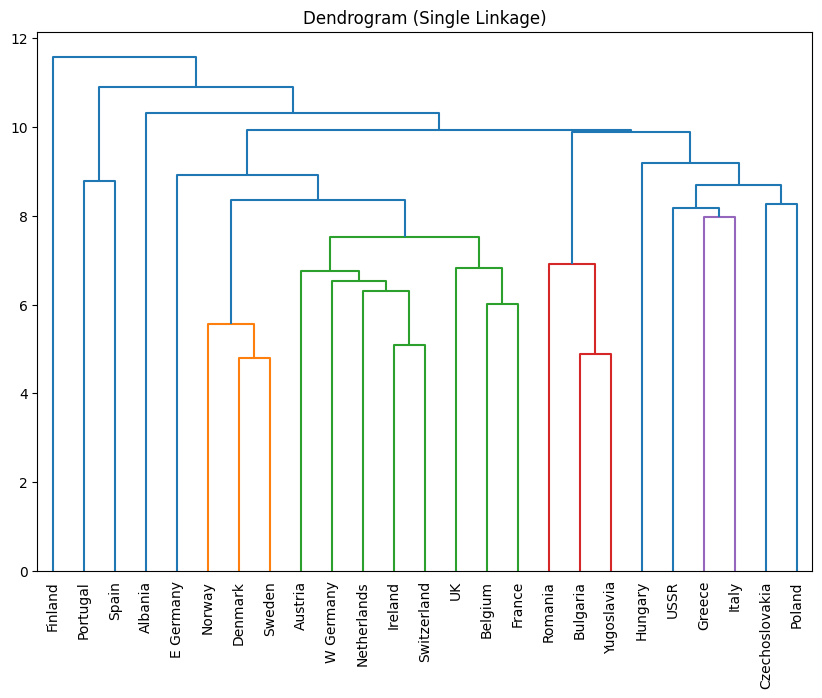

In [ ]:
# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
plt.title("Dendrogram (Single Linkage)")
dendrogram(Z_average, labels=protein_data["Country"].values, leaf_rotation=90)
plt.show()

### Complete Linkage (최장연결법)

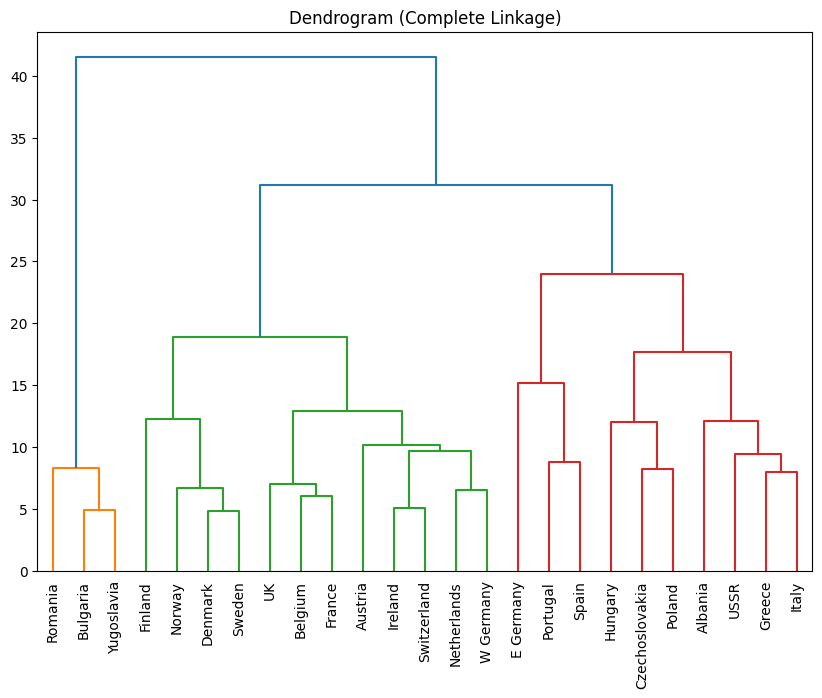

In [ ]:
Z_average = linkage(protein_values, method="complete")

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
plt.title("Dendrogram (Complete Linkage)")
dendrogram(Z_average, labels=protein_data["Country"].values, leaf_rotation=90)
plt.show()

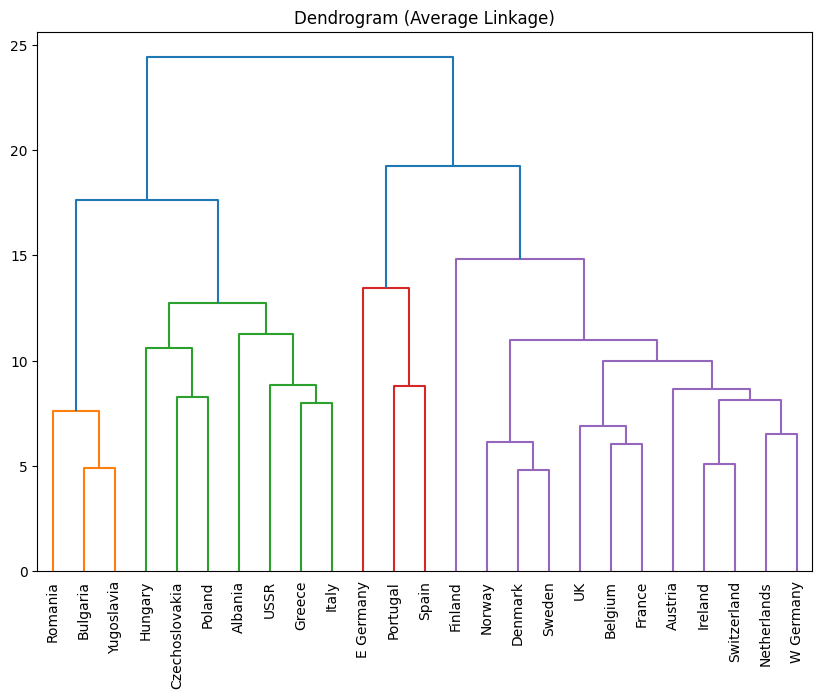

In [16]:
Z_average = linkage(protein_values, method="average")

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
plt.title("Dendrogram (Average Linkage)")
dendrogram(Z_average, labels=protein_data["Country"].values, leaf_rotation=90)
plt.show()

In [ ]:
Z_average = linkage(protein_values, method="average")

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
plt.title("Dendrogram (Average Linkage)")
dendrogram(Z_average, labels=protein_data["Country"].values, leaf_rotation=90)
plt.show()

### Word의 방법

In [18]:
# word의 방법은 scaling이 필요함
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
protein_scaled = scaler.fit_transform(protein_values)

Z = linkage(protein_values, method="ward")
print(Z)

[[ 5.         19.          4.79583152  2.        ]
 [ 3.         24.          4.8754487   2.        ]
 [11.         20.          5.09705797  2.        ]
 [ 2.          8.          6.00749532  2.        ]
 [13.         23.          6.52533524  2.        ]
 [14.         25.          6.5380935   3.        ]
 [21.         28.          7.184474    3.        ]
 [ 9.         12.          7.97684148  2.        ]
 [ 4.         15.          8.25530133  2.        ]
 [17.         26.          8.38033412  3.        ]
 [16.         18.          8.78862902  2.        ]
 [22.         32.          9.1124457   3.        ]
 [ 1.         29.          9.20543318  3.        ]
 [27.         37.         10.29970873  5.        ]
 [10.         33.         11.37292106  3.        ]
 [ 0.         36.         12.42148676  4.        ]
 [ 7.         30.         14.06443505  4.        ]
 [ 6.         35.         14.83149801  3.        ]
 [31.         38.         15.28125758  8.        ]
 [39.         40.         18.31

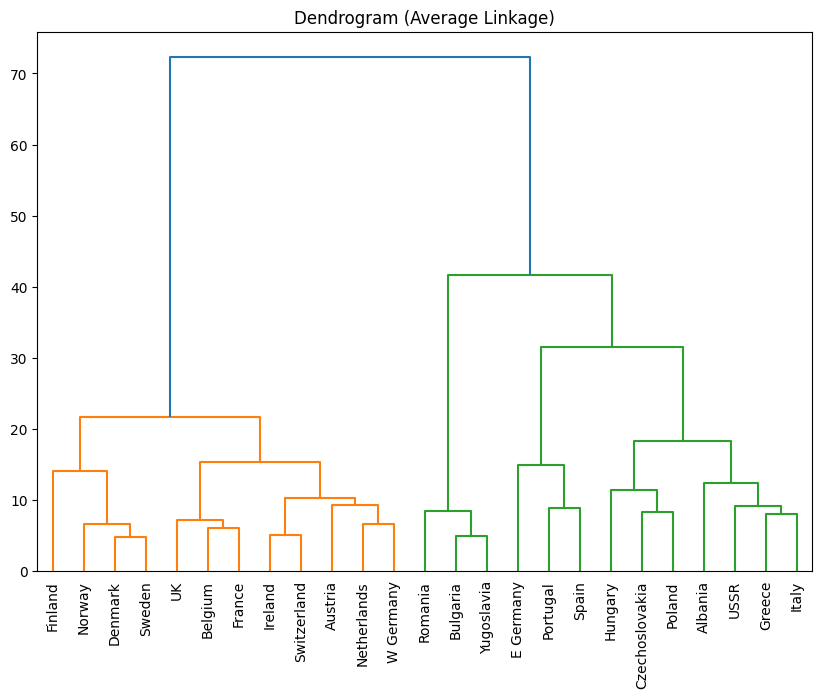

In [21]:
# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
plt.title("Dendrogram (Average Linkage)")
dendrogram(Z, labels=protein_data["Country"].values, leaf_rotation=90)
plt.show()

In [20]:
# 5. 군집 번호 할당 (ex: 3개의 클러스터로 나눔)
num_clusters = 3
clusters = fcluster(Z, num_clusters, criterion="maxclust")

# 6. 원본 데이터에 군집 번호 추가
protein_data["Cluster"] = clusters
protein_data

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,Cluster
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,3
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,1
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,1
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,3
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,1
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,3
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,1
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,1
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5,3


In [22]:
# 7. 각 군집별 개체 수 계산
cluster_counts = protein_data["Cluster"].value_counts().sort_index()
cluster_counts

Cluster
1    12
2     3
3    10
Name: count, dtype: int64

## K-means clustering

In [23]:
from sklearn.cluster import KMeans

In [26]:
protein_data = protein_data.drop(columns="Cluster")
protein_data

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5


In [38]:
features = protein_data.columns[1:]
X = protein_data[features]

X_scaled = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.08294065, -1.79475017, -2.22458425, -1.1795703 , -1.22503282,
         0.9348045 , -2.29596509,  1.24796771, -1.37825141,  1.07461005],
       [-0.28297397,  1.68644628,  1.24562107,  0.40046785, -0.6551106 ,
        -0.39505069, -0.42221774, -0.91079027,  0.09278868, -1.06239857],
       [ 1.11969872,  0.38790475,  1.06297868,  0.05573225,  0.06479116,
        -0.5252463 ,  0.88940541, -0.49959828, -0.07694671, -1.06239857],
       [-0.6183957 , -0.52383718, -1.22005113, -1.2657542 , -0.92507375,
         2.27395937, -1.98367386,  0.32278572,  0.03621022, -0.75711163],
       [-0.03903089,  0.96810416, -0.12419682, -0.6624669 , -0.6851065 ,
         0.19082957,  0.45219769, -1.01358827, -0.07694671,  0.15874921],
       [ 0.23540507,  0.8023329 ,  0.69769391,  1.13303099,  1.68457011,
        -0.96233157,  0.3272812 , -1.21918427, -0.98220215,  1.379897  ],
       [-0.43543839,  1.02336124,  0.69769391, -0.86356267,  0.33475432,
        -0.71124003,  1.38907137, -1.16778527

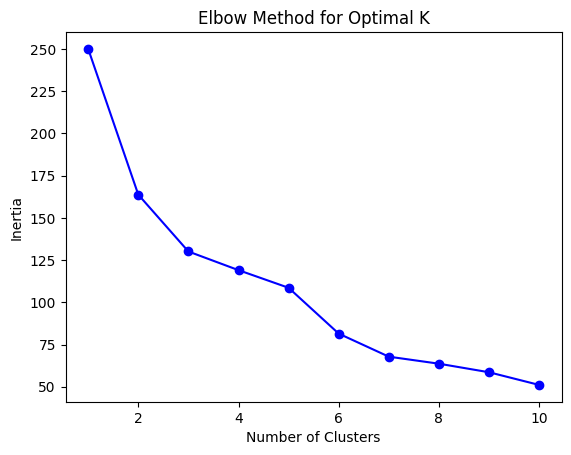

In [39]:
inertia = []
K = 11
for k in range(1, K):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 엘보우 그리기
plt.plot(range(1, K), inertia, 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [48]:
# optimal_k(최적 K)로 clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
protein_data["Cluster"] = kmeans.fit_predict(X_scaled)
protein_data

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,Cluster
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,2
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,1
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,1
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,1
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,1
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,1
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,1
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,1
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5,0


In [52]:
# 각 군집의 평균값 확인
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features
)

cluster_centers
cluster_centers["Cluster"] = range(optimal_k)
print(f"Cluster Centers: \n{cluster_centers}")

Cluster Centers: 
     RedMeat   WhiteMeat      Eggs       Milk      Fish    Cereals    Starch  \
0   8.125000    3.800000  2.475000  11.200000  7.625000  33.675000  3.975000   
1  11.340000    9.766667  3.580000  21.260000  4.686667  25.553333  4.853333   
2   7.183333    5.950000  1.633333  10.683333  1.050000  48.033333  3.033333   

       Nuts    Fr&Veg  Cluster  
0  5.675000  7.075000        0  
1  1.673333  3.740000        1  
2  4.833333  3.166667        2  


In [53]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
pca_df["Cluster"] = protein_data["Cluster"]
pca_df["Country"] = protein_data["Country"]

pca_df


,PCA1,PCA2,Cluster,Country
0,-3.699338,-1.133309,2,Albania
1,1.624474,-1.500258,1,Austria
2,1.800471,-0.154682,1,Belgium
3,-3.043954,-1.655056,2,Bulgaria
4,0.360814,-0.632436,1,Czechoslovakia
5,2.154810,1.052072,1,Denmark
6,1.582498,0.198693,1,E Germany
7,1.540066,0.066971,1,Finland
8,1.468731,0.631533,1,France
9,-2.040732,0.309834,0,Greece


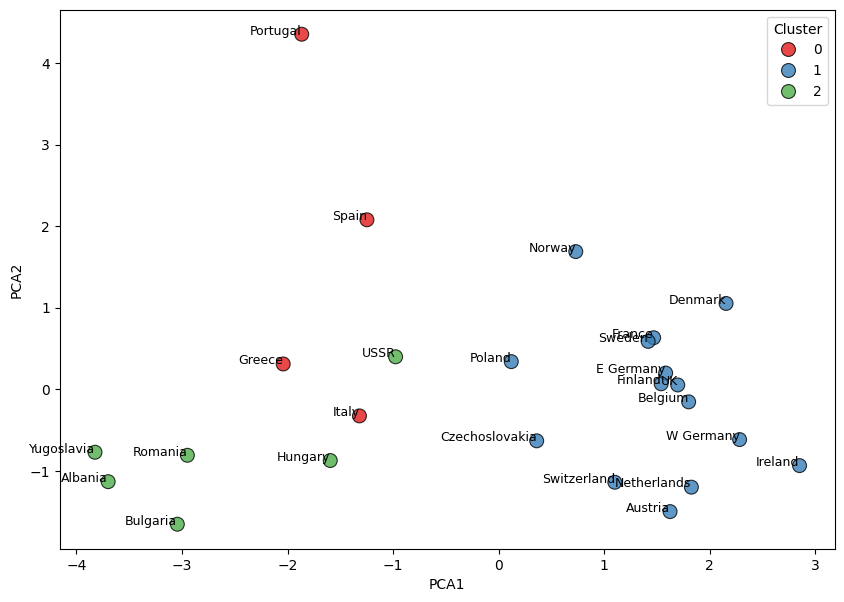

In [60]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df,
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="Set1",
    s=100,
    alpha=0.8,
    edgecolor='k'
)

# 각 점에 국가명 표시
for i in range(pca_df.shape[0]):
    plt.text(
        x=pca_df.PCA1[i],
        y=pca_df.PCA2[i],
        s=pca_df.Country[i],
        fontsize=9,
        ha="right"
    )

plt.legend(title="Cluster")
plt.show()

In [61]:
protein_data

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,Cluster
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,2
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,1
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,1
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,1
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,1
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,1
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,1
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,1
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5,0


## 군집의 개수